In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

from os import listdir
from tcn import TCN
from collections import defaultdict
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from tensorflow.keras.utils import to_categorical
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import concatenate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint

In [2]:
images=listdir(r"C:\Users\vibho\Documents\Visual studio code\DeepLearning\Project(Lung and Colon cancer detection)\IDC_regular_ps50_idx5")

In [3]:
dir=r"C:\Users\vibho\Documents\Visual studio code\DeepLearning\Project(Lung and Colon cancer detection)\IDC_regular_ps50_idx5"

In [4]:
print(len(images))

279


In [5]:
imageset=[]
for i in range(len(images)):
    patientID=images[i]
    for p in [0,1]:
        subd=dir + '/' + patientID
        category=subd+'/'+str(p)+'/'
        subf=listdir(category)
        for wsi in subf:
            image=category+wsi
            imageset.append([image, p])

In [6]:
print(len(imageset))

277524


In [7]:
length=len(imageset)
new_length=int(length/7)
imageset=imageset[:new_length]
print(len(imageset))

39646


In [8]:
imageset[5675]

['C:\\Users\\vibho\\Documents\\Visual studio code\\DeepLearning\\Project(Lung and Colon cancer detection)\\IDC_regular_ps50_idx5/10260/0/10260_idx5_x901_y1401_class0.png',
 0]

In [9]:
imagedir=imageset[0][0]
classification=imageset[0][1]
pic=Image.open(imagedir)

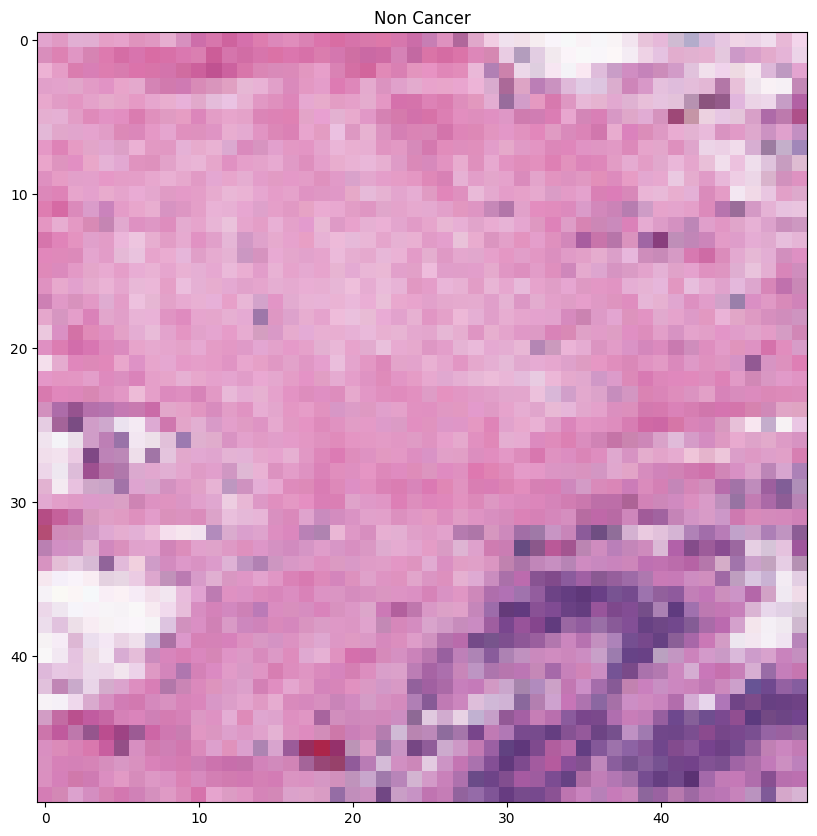

In [10]:
plt.figure(figsize=(10,10))
plt.imshow(pic)
plt.title("Non Cancer")
plt.show()

In [11]:
non_cancer = []  
cancer = []   

non_cancer_labels = []  
cancer_labels = []   

for img, classf in imageset:
    if classf == 0:
        non_cancer.append(img)
        non_cancer_labels.append(classf)
    elif classf == 1:
        cancer.append(img)
        cancer_labels.append(classf)

In [12]:
neg_sample=random.sample(non_cancer,100)
pos_sample=random.sample(cancer,100)

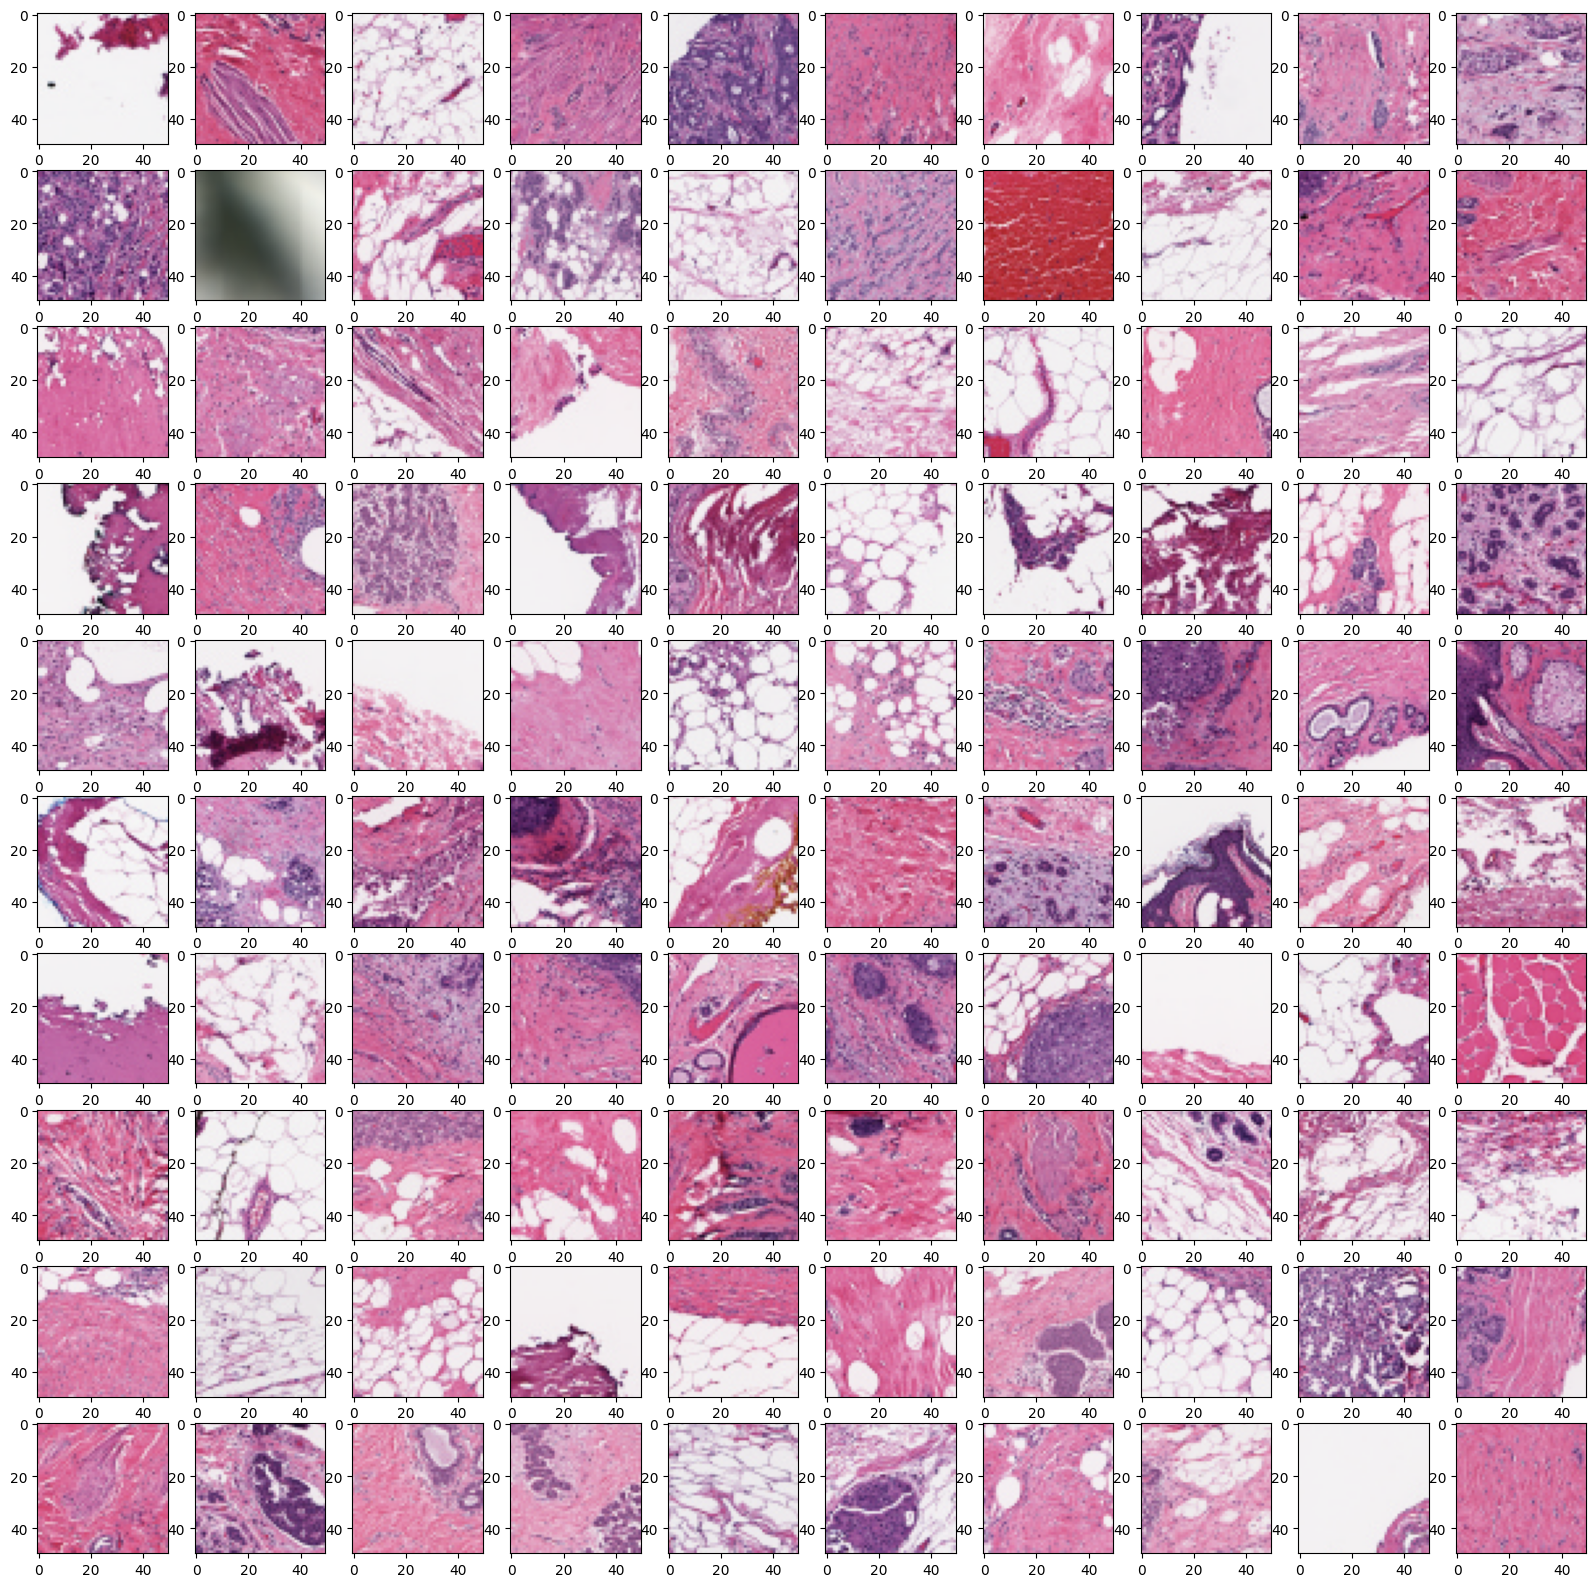

In [13]:
fig,ax=plt.subplots(10,10,figsize=(20,20))
for i in range(10):
    for j in range(10):
        mri=neg_sample[j+10*i]
        pic=Image.open(mri)
        ax[i,j].imshow(pic)
        ax[i,j].grid(False)

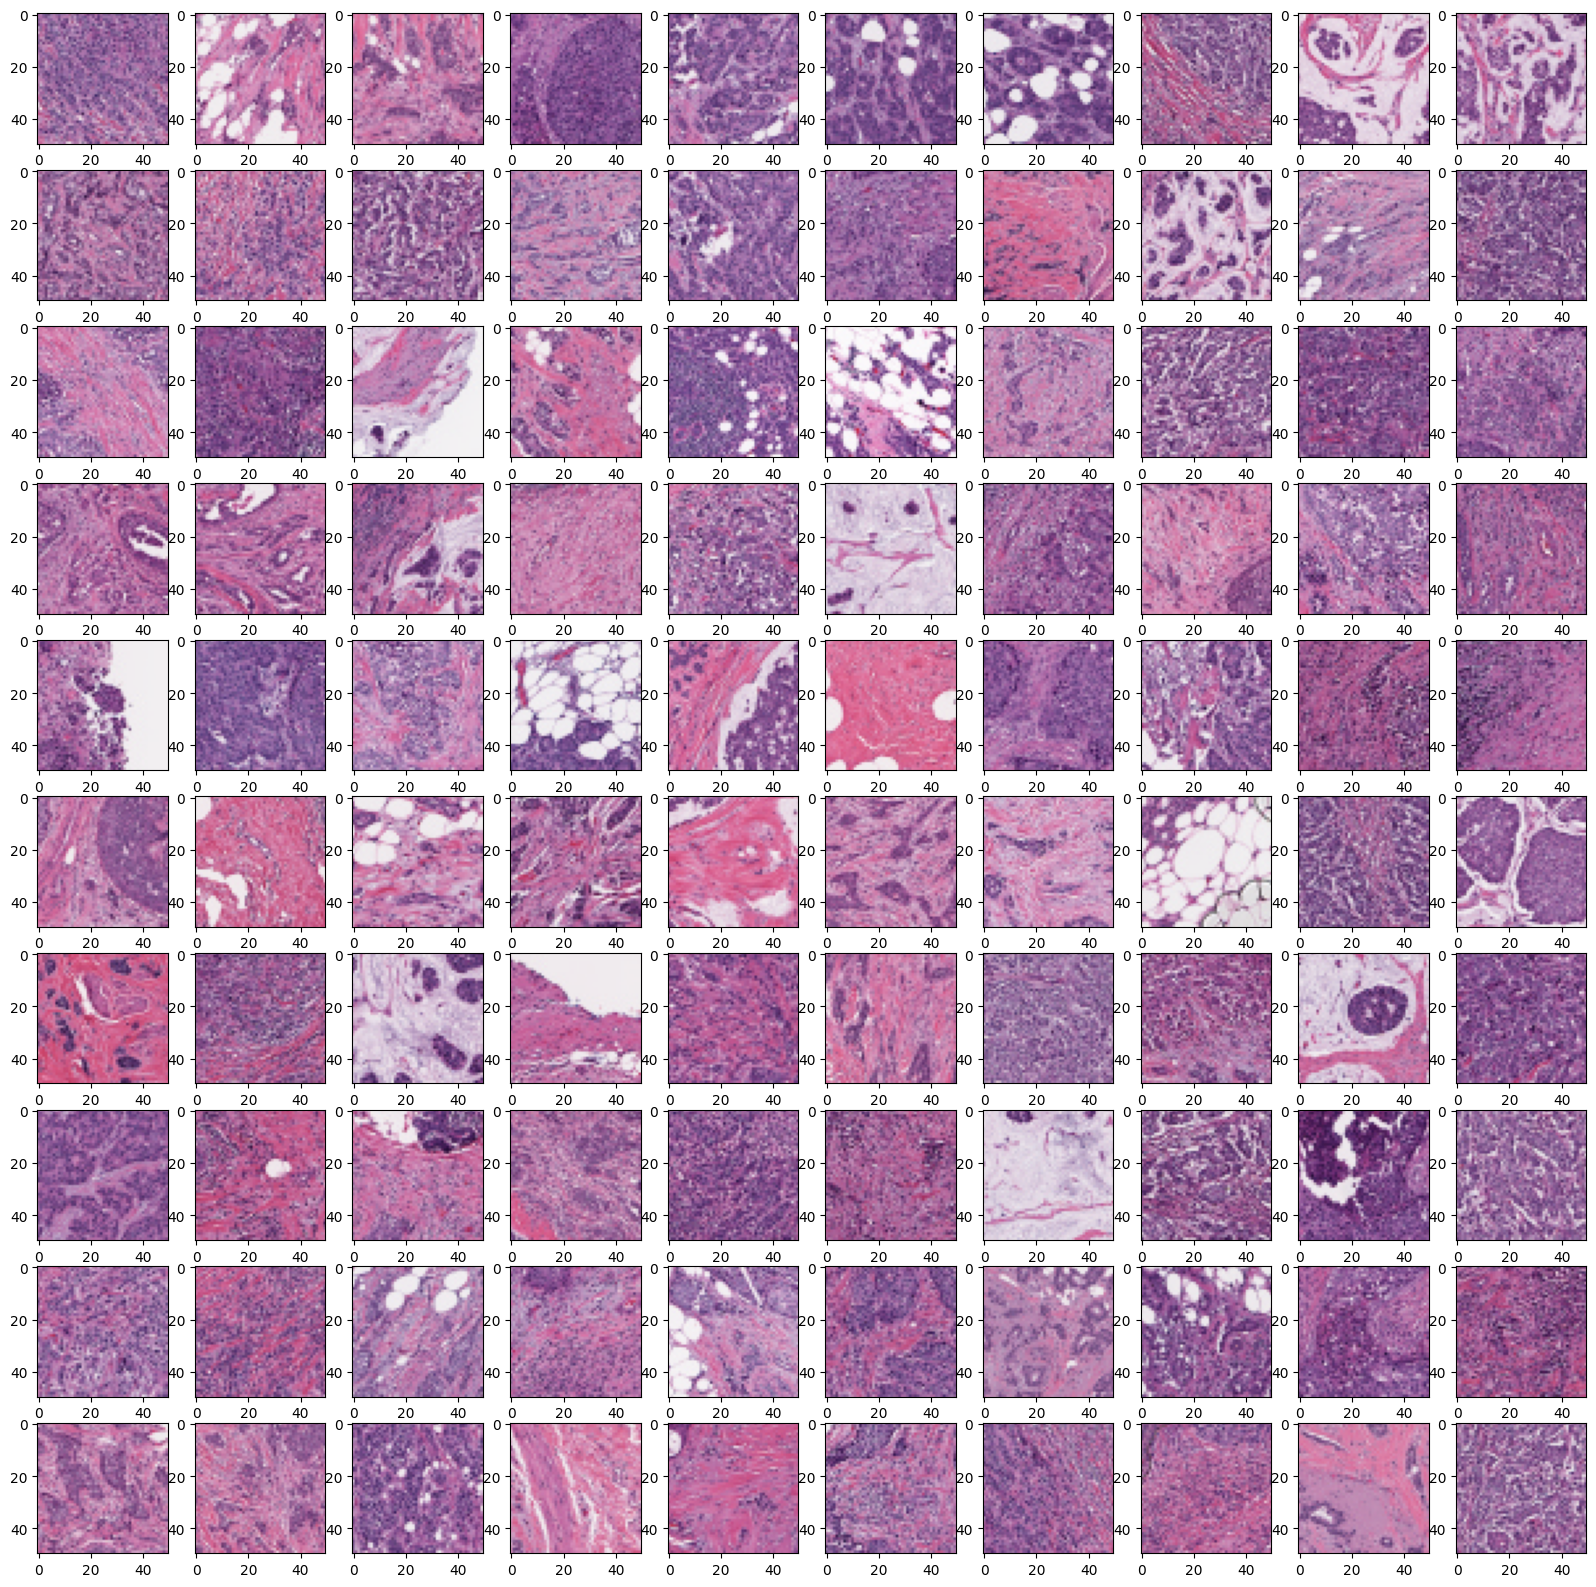

In [14]:
fig,ax=plt.subplots(10,10,figsize=(20,20))
for i in range(10):
    for j in range(10):
        mri=pos_sample[j+10*i]
        pic=Image.open(mri)
        ax[i,j].imshow(pic)
        ax[i,j].grid(False)

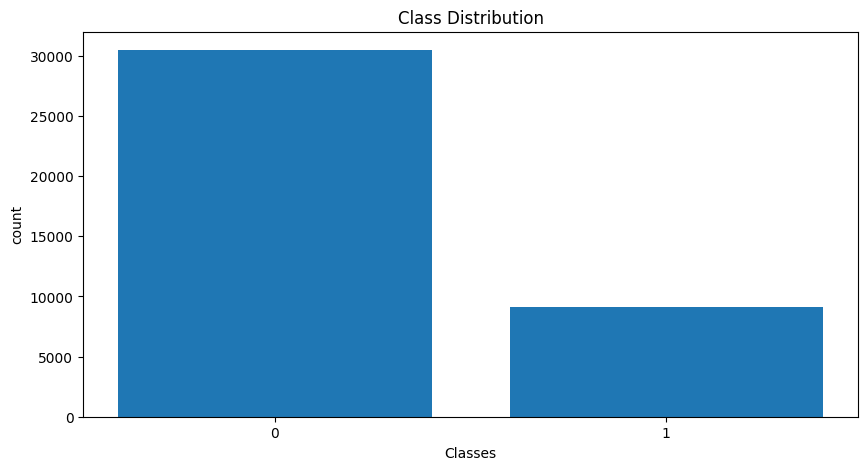

In [15]:
labels=[item[1] for item in imageset]
class_counts=defaultdict(int)
for label in labels:
    class_counts[label]+=1

class_labels=list(class_counts.keys())
class_counts=list(class_counts.values())

labels=[]
plt.figure(figsize=(10,5))
plt.bar(class_labels, class_counts)
plt.xlabel('Classes')
plt.ylabel('count')
plt.title('Class Distribution')
plt.xticks(class_labels,class_labels)
plt.show()

In [16]:
resized_non_cancer=[]
resized_cancer=[]

for i in non_cancer:
    pic=Image.open(i)
    resized_non_cancer_image=pic.resize((50,50), Image.LANCZOS)
    resized_non_cancer.append(resized_non_cancer_image)
    
for i in cancer:
    pic=Image.open(i)
    resized_cancer_image=pic.resize((50,50), Image.LANCZOS)
    resized_cancer.append(resized_cancer_image)


In [17]:
normalized_non_cancer=[]
normalized_cancer=[]
for i in resized_non_cancer:
    normalized_non_cancer.append(np.array(i)/255.0)
    
for i in resized_cancer:
    normalized_cancer.append(np.array(i)/255.0)

In [18]:
normalized_non_cancer=np.array(normalized_non_cancer)
normalized_cancer=np.array(normalized_cancer)

In [19]:
normalized_non_cancer=shuffle(normalized_non_cancer, random_state=42)
normalized_cancer=shuffle(normalized_cancer, random_state=42)

In [20]:
print(normalized_non_cancer.shape)
print(normalized_cancer.shape)

(30492, 50, 50, 3)
(9154, 50, 50, 3)


In [21]:
Non_cancer_train, Non_cancer_temp, Non_cancer_train_labels, Non_cancer_temp_labels=train_test_split(normalized_non_cancer, non_cancer_labels, test_size=0.3, stratify=non_cancer_labels, random_state=42)
Cancer_train, Cancer_temp, Cancer_train_labels, Cancer_temp_labels=train_test_split(normalized_cancer, cancer_labels, test_size=0.3, stratify=cancer_labels, random_state=42)
Non_cancer_Val, Non_cancer_test, Non_cancer_val_labels, Non_cancer_test_labels=train_test_split(Non_cancer_temp, Non_cancer_temp_labels, test_size=0.5, stratify=Non_cancer_temp_labels, random_state=42)
Cancer_val, Cancer_test, Cancer_val_labels, Cancer_test_labels=train_test_split(Cancer_temp,Cancer_temp_labels, test_size=0.5, stratify=Cancer_temp_labels, random_state=42)

training_data=np.concatenate((Non_cancer_train, Cancer_train), axis=0)
training_labels=np.concatenate((Non_cancer_train_labels, Cancer_train_labels), axis=0)
validation_data=np.concatenate((Non_cancer_Val,Cancer_val), axis=0)
validation_labels=np.concatenate((Non_cancer_val_labels, Cancer_val_labels), axis=0)
testing_data=np.concatenate((Non_cancer_test, Cancer_test), axis=0)
testing_labels=np.concatenate((Non_cancer_test_labels, Cancer_test_labels), axis=0)

In [22]:
training_labels=to_categorical(training_labels,2)
validation_labels=to_categorical(validation_labels,2)
testing_labels=to_categorical(testing_labels,2)

In [23]:
print('Training_data Shape: ', training_data.shape)
print('Training_labels Shape: ', training_labels.shape)
print('Validation_data Shape', validation_data.shape)
print('Validation_labels Shapes', validation_labels.shape)
print('Testing_data Shapes', testing_data.shape)
print('Testing_labels Shapes', testing_labels.shape)

Training_data Shape:  (27751, 50, 50, 3)
Training_labels Shape:  (27751, 2)
Validation_data Shape (5947, 50, 50, 3)
Validation_labels Shapes (5947, 2)
Testing_data Shapes (5948, 50, 50, 3)
Testing_labels Shapes (5948, 2)


In [24]:
model=keras.Sequential([
    layers.Conv2D(32,(3,3), padding='same', activation='relu', input_shape=(50,50,3)),
    layers.MaxPooling2D(strides=2),
    layers.Conv2D(64,(3,3), padding='same', activation='relu'),
    layers.MaxPooling2D((3,3), strides=2),
    layers.Conv2D(128,(3,3), padding='same', activation='relu'),
    layers.MaxPooling2D((3,3),strides=2),
    layers.Conv2D(256,(3,3), padding='same', activation='relu'),
    layers.MaxPooling2D((3,3),strides=2),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(2, activation='softmax')
])

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 50, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 25, 25, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 5, 5, 128)        0

In [26]:
optimizer=keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [27]:
early_stop=keras.callbacks.EarlyStopping( monitor='val_loss', patience=10, restore_best_weights=True)

In [28]:
history=model.fit(training_data, training_labels, validation_data=(validation_data, validation_labels), epochs=25, batch_size=256, callbacks=[early_stop])

Epoch 1/25
109/109 [==============================] - 6s 33ms/step - loss: 0.3976 - accuracy: 0.8247 - val_loss: 0.3636 - val_accuracy: 0.8480
Epoch 2/25
109/109 [==============================] - 3s 26ms/step - loss: 0.3372 - accuracy: 0.8608 - val_loss: 0.3495 - val_accuracy: 0.8545
Epoch 3/25
109/109 [==============================] - 3s 26ms/step - loss: 0.3258 - accuracy: 0.8625 - val_loss: 0.3041 - val_accuracy: 0.8692
Epoch 4/25
109/109 [==============================] - 3s 26ms/step - loss: 0.3105 - accuracy: 0.8676 - val_loss: 0.3111 - val_accuracy: 0.8665
Epoch 5/25
109/109 [==============================] - 3s 26ms/step - loss: 0.3185 - accuracy: 0.8664 - val_loss: 0.3006 - val_accuracy: 0.8683
Epoch 6/25
109/109 [==============================] - 3s 26ms/step - loss: 0.3020 - accuracy: 0.8707 - val_loss: 0.2967 - val_accuracy: 0.8764
Epoch 7/25
109/109 [==============================] - 3s 26ms/step - loss: 0.2965 - accuracy: 0.8738 - val_loss: 0.2855 - val_accuracy: 0.8769

In [29]:
model.evaluate(testing_data, testing_labels)

186/186 [==============================] - 1s 5ms/step - loss: 0.2910 - accuracy: 0.8773


[0.2910352349281311, 0.8772696852684021]

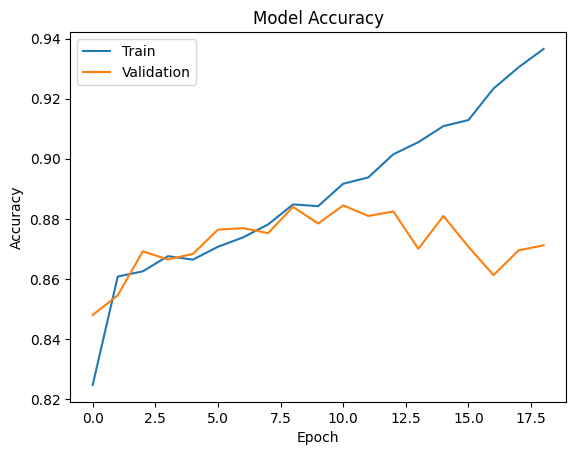

In [30]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

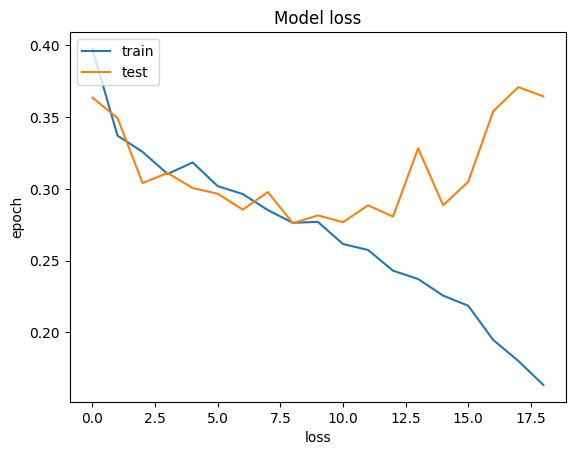

In [31]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('loss')
plt.ylabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [32]:
pred=model.predict(testing_data)
pred_classes=np.argmax(pred, axis=1)

186/186 [==============================] - 1s 3ms/step


In [33]:
def single_label_conversion(one_hot_labels):
    return one_hot_labels.argmax(axis=1)
real_training_labels=single_label_conversion(training_labels)
real_validation_labels=single_label_conversion(validation_labels)
real_test_labels=single_label_conversion(testing_labels)

Accuracy: 0.88
Precision: 0.77
Recall: 0.68
F1: 0.72


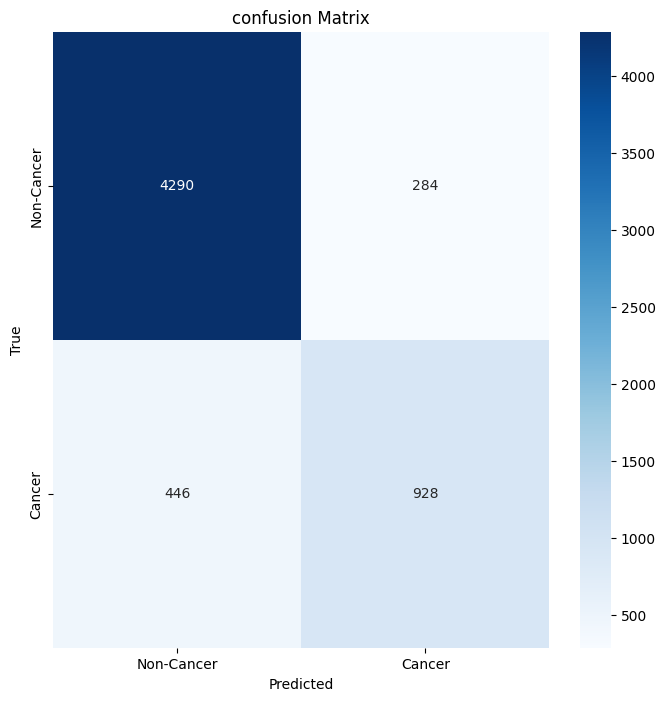

In [34]:
accuracy=accuracy_score(real_test_labels, pred_classes)
print(f'Accuracy: {accuracy:.2f}')

precision=precision_score(real_test_labels, pred_classes)
print(f'Precision: {precision:.2f}')

recall=recall_score(real_test_labels, pred_classes)
print(f'Recall: {recall:.2f}')

f1=f1_score(real_test_labels, pred_classes)
print(f'F1: {f1:.2f}')

cm=confusion_matrix(real_test_labels, pred_classes)
plt.subplots(figsize=(8,8))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=["Non-Cancer", "Cancer"], yticklabels=["Non-Cancer","Cancer"])
plt.title('confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [35]:
model.save('CNN.h5')